In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statistics import mean
import numpy as np
from matplotlib.patches import Rectangle

In [85]:
df = pd.read_csv('admission_data.csv', index_col=0)


##  EDA and Data Cleaning
With an overview of the data I have identified some areas that need some fixing:
- Dates, I have an hypothesis that grades increase over time. Hence, in order to have dates as a feature I need to convert the "Termin" column ot dates. Furthmore, I am planning on making linecharts later with the development of the admission grade over time. To do that it will be easier to have some dates to each grade
- Renaming some of the columns, there are some long and complicated names which could be simplified making them easier/faster to access
- 

In [86]:
original_shape = df.shape
original_shape

(14795, 20)

In [87]:
df.drop_duplicates(['Termin', 'Anm.kod'], inplace=True)
print(df.shape)
print('-----')
print('{} rows where dropped'.format(original_shape[0] - df.shape[0]))

(12918, 20)
-----
1877 rows where dropped


In [88]:
df.describe()

,Totalt antal sökande,1:a handssökande,Kvinnor 1:a hand,Kvinnor totalt,Män 1:a hand,Män totalt,25-34 1:a hand,25-34 totalt,<= 24 1:a hand,<= 24 totalt,>=35 1:a hand,>=35 totalt,BI,BII,HP
count,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,11379.000000,10947.000000,10829.000000
mean,793.161790,153.199566,92.847422,478.823967,57.576018,301.617046,36.843552,166.279997,99.665273,565.600015,13.914615,48.561000,16.882600,16.908123,0.916423
std,905.192966,215.725835,142.553499,614.868754,90.324409,362.701074,54.895810,202.693391,153.960979,686.027665,27.608813,79.576643,2.415046,2.322477,0.371053
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.190000,9.690000,0.050000
25%,262.000000,40.000000,15.000000,107.000000,13.000000,86.000000,7.000000,44.000000,23.000000,170.000000,1.000000,7.000000,15.200000,15.300000,0.650000
50%,493.000000,82.000000,40.000000,257.000000,29.000000,179.000000,17.000000,91.000000,51.000000,340.000000,4.000000,18.000000,16.870000,16.760000,0.900000
75%,934.000000,177.000000,106.000000,570.000000,65.000000,367.000000,43.000000,198.000000,110.000000,665.000000,15.000000,54.000000,18.555000,18.400000,1.200000
max,8420.000000,2321.000000,1427.000000,5027.000000,1237.000000,3268.000000,601.000000,1684.000000,1901.000000,6628.000000,393.000000,1077.000000,22.500000,22.500000,2.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12918 entries, 0 to 14793
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Termin                12918 non-null  object 
 1   Program/kurs          12918 non-null  object 
 2   Utbildningens namn    12918 non-null  object 
 3   Anm.kod               12918 non-null  object 
 4   Univ/högskola         12918 non-null  object 
 5   Totalt antal sökande  12918 non-null  int64  
 6   1:a handssökande      12918 non-null  int64  
 7   Kvinnor 1:a hand      12918 non-null  int64  
 8   Kvinnor totalt        12918 non-null  int64  
 9   Män 1:a hand          12918 non-null  int64  
 10  Män totalt            12918 non-null  int64  
 11  25-34 1:a hand        12918 non-null  int64  
 12  25-34 totalt          12918 non-null  int64  
 13  <= 24 1:a hand        12918 non-null  int64  
 14  <= 24 totalt          12918 non-null  int64  
 15  >=35 1:a hand      

In this case I intent to only look at "BI" which is the main admission group where it is your grade from High Svhool that is the determinating factor. Hence, I'll remove 'BII' and 'HP'. Furthermore, since there are missing values for "BI" I'll drop those rows as well.

In [90]:
df.drop(columns=['BII', 'HP'], inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12918 entries, 0 to 14793
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Termin                12918 non-null  object 
 1   Program/kurs          12918 non-null  object 
 2   Utbildningens namn    12918 non-null  object 
 3   Anm.kod               12918 non-null  object 
 4   Univ/högskola         12918 non-null  object 
 5   Totalt antal sökande  12918 non-null  int64  
 6   1:a handssökande      12918 non-null  int64  
 7   Kvinnor 1:a hand      12918 non-null  int64  
 8   Kvinnor totalt        12918 non-null  int64  
 9   Män 1:a hand          12918 non-null  int64  
 10  Män totalt            12918 non-null  int64  
 11  25-34 1:a hand        12918 non-null  int64  
 12  25-34 totalt          12918 non-null  int64  
 13  <= 24 1:a hand        12918 non-null  int64  
 14  <= 24 totalt          12918 non-null  int64  
 15  >=35 1:a hand      

In [92]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11379 entries, 0 to 14558
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Termin                11379 non-null  object 
 1   Program/kurs          11379 non-null  object 
 2   Utbildningens namn    11379 non-null  object 
 3   Anm.kod               11379 non-null  object 
 4   Univ/högskola         11379 non-null  object 
 5   Totalt antal sökande  11379 non-null  int64  
 6   1:a handssökande      11379 non-null  int64  
 7   Kvinnor 1:a hand      11379 non-null  int64  
 8   Kvinnor totalt        11379 non-null  int64  
 9   Män 1:a hand          11379 non-null  int64  
 10  Män totalt            11379 non-null  int64  
 11  25-34 1:a hand        11379 non-null  int64  
 12  25-34 totalt          11379 non-null  int64  
 13  <= 24 1:a hand        11379 non-null  int64  
 14  <= 24 totalt          11379 non-null  int64  
 15  >=35 1:a hand      

In [93]:
df.rename(columns={
    'Utbildningens namn': 'name', 
    'Univ/högskola': 'Uni', 
    'Totalt antal sökande': 'appl_tot', 
    '1:a handssökande': 'appl_1',
    'Kvinnor 1:a hand': 'f_appl_1', 
    'Kvinnor totalt':'f_tot', 
    'Män 1:a hand': 'm_appl_1', 
    'Män totalt':'m_tot',
    '25-34 1:a hand': '25-34_1',
    '25-34 totalt': '25-34_tot',
    '<= 24 1:a hand': '<=24_1',
    '<= 24 totalt': '<=24_tot',
    '>=35 1:a hand': '>=35_1',
    '>=35 totalt': '>=35_tot'
                  }, inplace=True)

In [94]:
df['year'] = df.Termin.apply(lambda x: x[2:])
df['semester'] = df.Termin.apply(lambda x: x[0:2])
df['month'] = df.Termin.apply(lambda x: 1 if x[0:2] == 'VT' else 7)
df['day'] = 1
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [95]:
df.drop(columns=['year', 'month', 'day'], inplace=True)

In [96]:
# Converting date to an interger
df['days'] = (df['date'] - df['date'].min())/ np.timedelta64(1, 'D')

In [97]:
# Move the target valeus to the first column to get a better view in heatmaps etc.
target = 'BI'
feat_cols = df.pop(target)
df.insert(0, target, feat_cols)
df

,BI,Termin,Program/kurs,name,Anm.kod,Uni,appl_tot,appl_1,f_appl_1,f_tot,...,m_tot,25-34_1,25-34_tot,<=24_1,<=24_tot,>=35_1,>=35_tot,semester,date,days
0,15.31,HT2020,Program,Fysisk planering,BTH-87001,Blekinge tekniska högskola,433,98,47,241,...,191,15,73,80,348,3,11,HT,2020-07-01,3653.0
8,14.10,HT2020,Program,Sjuksköterskeprogrammet,BTH-87005,Blekinge tekniska högskola,668,147,111,507,...,156,53,203,59,374,33,86,HT,2020-07-01,3653.0
16,15.06,HT2020,Program,Civilingenjör i AI och maskininlärning,BTH-87006,Blekinge tekniska högskola,279,55,4,25,...,254,7,31,48,244,0,4,HT,2020-07-01,3653.0
24,16.61,HT2020,Program,Civilingenjör i industriell ekonomi,BTH-87008,Blekinge tekniska högskola,324,24,5,92,...,230,5,23,19,298,0,1,HT,2020-07-01,3653.0
32,14.85,HT2020,Program,Civilingenjör i spel- och programvaruteknik,BTH-87012,Blekinge tekniska högskola,250,48,3,19,...,229,1,19,47,228,0,1,HT,2020-07-01,3653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14550,20.80,VT2011,Program,Tandläkarprogrammet,UMU-01403,Umeå universitet,833,177,103,509,...,298,47,189,112,576,11,42,VT,2011-01-01,184.0
14552,11.37,VT2011,Program,Lärarprogrammet Förskola/förskoleklass,UMU-01603,Umeå universitet,195,81,69,169,...,26,32,65,45,125,4,5,VT,2011-01-01,184.0
14554,15.20,VT2011,Program,Lärarprogrammet Tvåämneskombination: ingångsäm...,UMU-01611,Umeå universitet,38,16,12,29,...,9,1,7,14,30,1,1,VT,2011-01-01,184.0
14556,13.60,VT2011,Program,Lärarprogrammet Tvåämneskombination: ingångsäm...,UMU-01625,Umeå universitet,21,10,9,18,...,2,3,6,5,12,1,2,VT,2011-01-01,184.0


In [49]:
corr = df.corr()

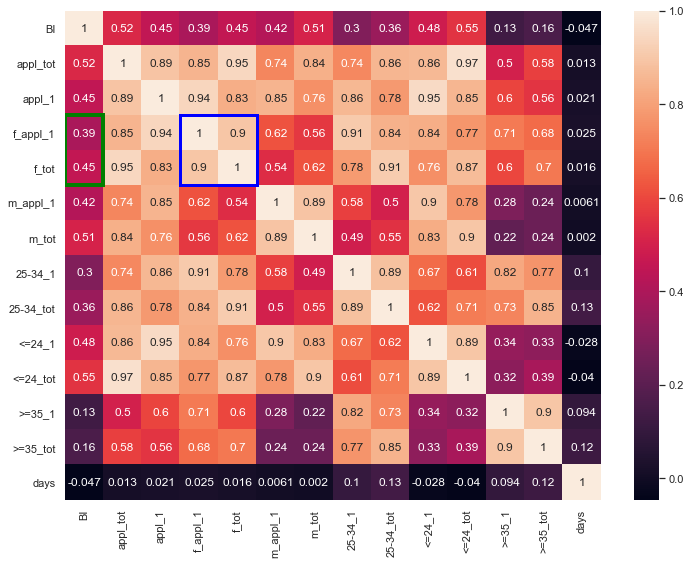

In [147]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True)
ax.add_patch(Rectangle((3,3),2,2, fill=False, edgecolor='blue', lw=3))
ax.add_patch(Rectangle((0,3),1,2, fill=False, edgecolor='green', lw=4))
sns.set(font_scale=0.5)
plt.savefig('heatmap.png')
plt.show()

As you can see above there are some (expected codependency) beteween the number of applicants who had a program as their first choice and the total number of aplicants. Between those two variables it seems that it is the variable with the total number of applicants that seem to have a stronger correlationto the admission grade (BI).

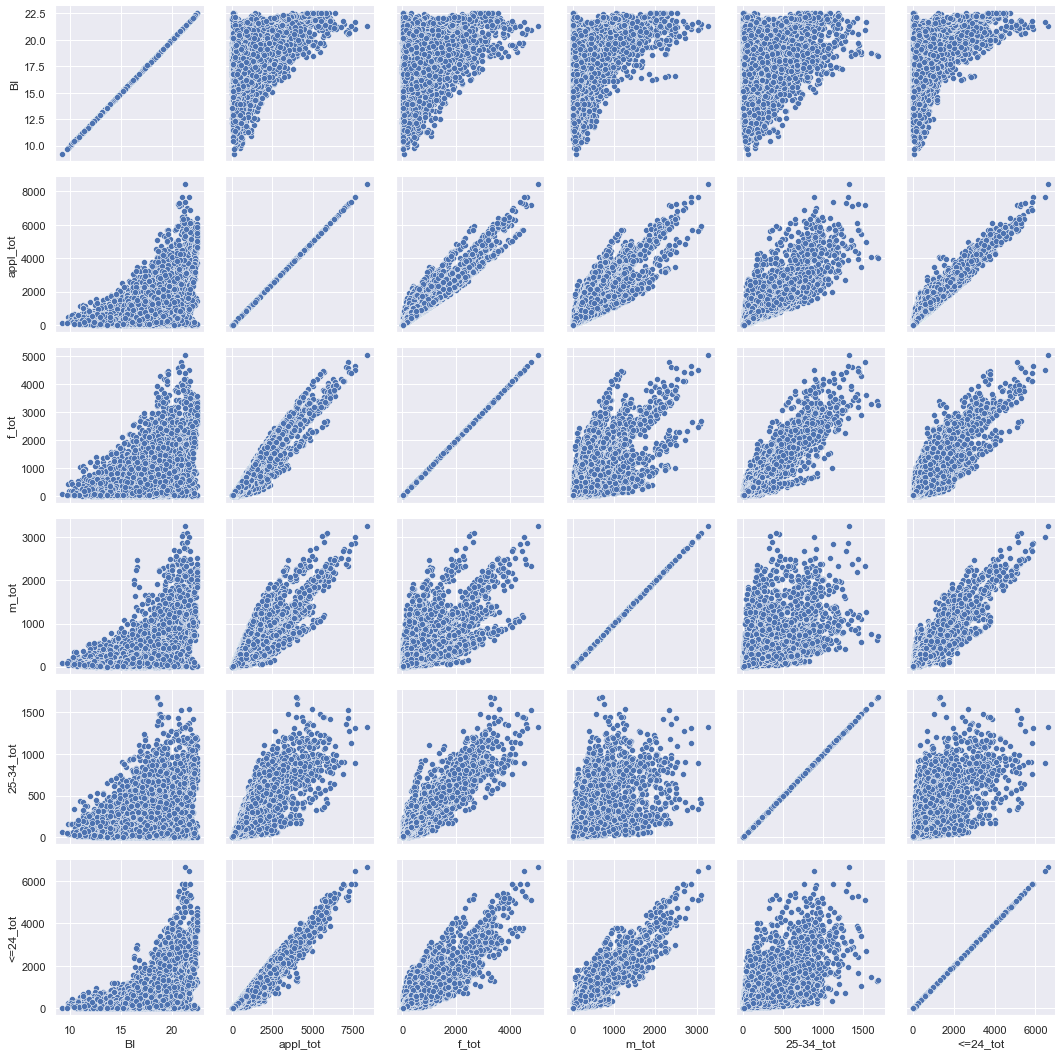

In [51]:
df2 = df[['BI', 'appl_tot', 'f_tot', 'm_tot', '25-34_tot', '<=24_tot']]
sns.set_theme(style='darkgrid')
g = sns.PairGrid(df2)
g.map(sns.scatterplot)

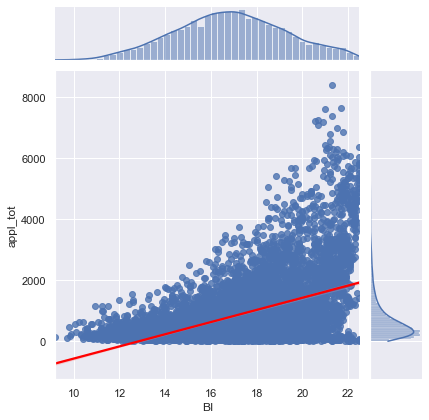

In [52]:
sns.jointplot(x='BI', y= 'appl_tot', data=df, kind="reg", line_kws={"color": "red"})

In [53]:
law_su = df[(df['Uni']== 'Stockholms universitet') & (df['name']== 'Juristprogrammet')]

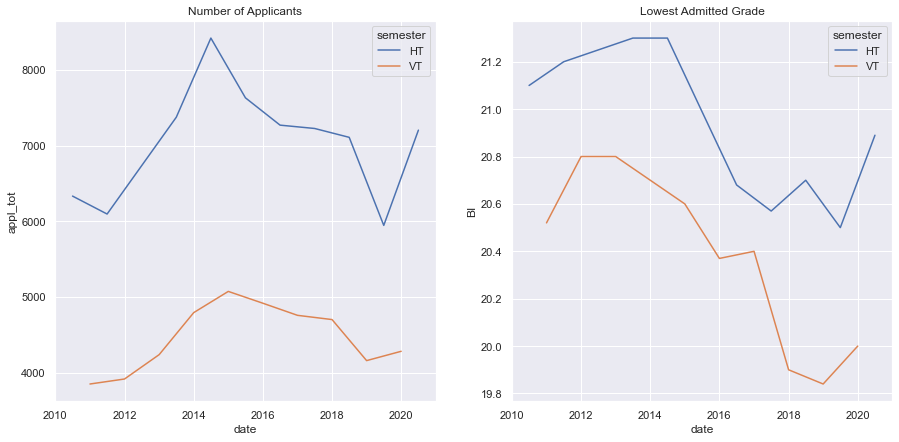

In [54]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax0 = sns.lineplot(x='date', y='appl_tot', hue='semester', data=law_su, ax=ax[0])
ax1 = sns.lineplot(x='date', y='BI', hue='semester', data=law_su, ax=ax[1])

ax0.title.set_text('Number of Applicants')
ax1.title.set_text('Lowest Admitted Grade')

In [98]:
# Standardizing the program names

df['name'] = df.name.apply(lambda x: 'Ekonomprogrammet' if 'Ekonom' in x.lower() else x)
df['name'] = df.name.apply(lambda x: 'Ekonomprogrammet' if 'ekonom' in x.lower() else x)
df['name'] = df.name.apply(lambda x: 'Grundlärarprogrammet' if 'Grundlärar' in x else x)
df['name'] = df.name.apply(lambda x: 'Sjuksköterskeprogrammet' if 'Sjukskötersk' in x else x)
df['name'] = df.name.apply(lambda x: 'Sjuksköterskeprogrammet' if 'sjukskötersk' in x else x)
df['name'] = df.name.apply(lambda x: 'Civilingenjör' if 'Civilingenjör' in x else x)
df['name'] = df.name.apply(lambda x: 'Civilingenjör' if 'civilingenjör' in x else x)
df['name'] = df.name.apply(lambda x: 'Spelutveckling' if 'spel' in x else x)
df['name'] = df.name.apply(lambda x: 'Spelutveckling' if 'Spel' in x else x)
df['name'] = df.name.apply(lambda x: 'Webbutveckling' if 'Webb' in x else x)
df['name'] = df.name.apply(lambda x: 'Webbutveckling' if 'webb' in x else x)
df['name'] = df.name.apply(lambda x: 'Personalvetare' if 'personal' in x else x)
df['name'] = df.name.apply(lambda x: 'Personalvetare' if 'Personal' in x else x)
df['name'] = df.name.apply(lambda x: 'Fysioterapeutprogrammet' if 'Sjukgymnast' in x else x)
df['name'] = df.name.apply(lambda x: 'Fysioterapeutprogrammet' if 'Fysioter' in x else x)
df['name'] = df.name.apply(lambda x: 'Biomedicinska analytikerprogrammet' if 'Biomedicinsk' in x else x)
df['name'] = df.name.apply(lambda x: 'Biomedicinprogrammet' if 'Biomedicinp' in x else x)
df['name'] = df.name.apply(lambda x: 'Ämneslärarprogrammet' if 'Ämneslärar' in x else x)
df['name'] = df.name.apply(lambda x: 'Journalist' if 'Journalist' in x else x)
df['name'] = df.name.apply(lambda x: 'Högskoleingejör' if 'Högskoleingenjör' in x else x)
df['name'] = df.name.apply(lambda x: 'Högskoleingejör' if 'högskoleingenjör' in x else x)
df['name'] = df.name.apply(lambda x: 'Samhällsvetarprogrammet' if 'Samhällsvet' in x else x)
df['name'] = df.name.apply(lambda x: 'Samhällsplanerarprogrammet' if 'Samhällsplan' in x else x)
df['name'] = df.name.apply(lambda x: 'Samhällsplanerarprogrammet' if 'samhällsplan' in x else x)
df['name'] = df.name.apply(lambda x: 'Samhällsvetarprogrammet' if 'Samhällsana' in x else x)
df['name'] = df.name.apply(lambda x: 'Samhällsvetarprogrammet' if 'samhällsana' in x else x)
df['name'] = df.name.apply(lambda x: 'Samhällsvetarprogrammet' if 'Samhälls-' in x else x)
df['name'] = df.name.apply(lambda x: 'Statsvetenskap' if 'Statsvet' in x else x)
df['name'] = df.name.apply(lambda x: 'Statsvetenskap' if 'statsvet' in x else x)
df['name'] = df.name.apply(lambda x: 'Juristprogrammet' if 'Juri' in x else x)
df['name'] = df.name.apply(lambda x: 'Juristprogrammet' if 'juri' in x else x)
df['name'] = df.name.apply(lambda x: 'Arkitektur' if 'Arkitekt' in x else x)
df['name'] = df.name.apply(lambda x: 'Byggingenjör' if 'Byggingenjör' in x else x)
df['name'] = df.name.apply(lambda x: 'Tekniskt Basår' if 'Tekniskt' in x else x)
df['name'] = df.name.apply(lambda x: 'Tekniskt Basår' if 'Basår' in x else x)
df['name'] = df.name.apply(lambda x: 'Tekniskt Basår' if 'basår' in x else x)
df['name'] = df.name.apply(lambda x: 'Studie- och yrkesvägledarprogrammet' if 'Studie' in x else x)
df['name'] = df.name.apply(lambda x: 'Beteendevetenskapliga programmet' if 'Beteende' in x else x)
df['name'] = df.name.apply(lambda x: 'Beteendevetenskapliga programmet' if 'beteende' in x else x)
df['name'] = df.name.apply(lambda x: 'Förskolläraprogrammet' if 'Förskol' in x else x)
df['name'] = df.name.apply(lambda x: 'Kommunikation' if 'Kommunik' in x else x)
df['name'] = df.name.apply(lambda x: 'Kommunikation' if 'kommunik' in x else x)
df['name'] = df.name.apply(lambda x: 'Matematik' if 'Mate' in x else x)
df['name'] = df.name.apply(lambda x: 'Matematik' if 'mate' in x else x)
df['name'] = df.name.apply(lambda x: 'Krimonologi' if 'Krim' in x else x)
df['name'] = df.name.apply(lambda x: 'Krimonologi' if 'krim' in x else x)
df['name'] = df.name.apply(lambda x: 'Produktutveckling' if 'Produktutv' in x else x)
df['name'] = df.name.apply(lambda x: 'Systemutveckling' if 'systemutv' in x else x)
df['name'] = df.name.apply(lambda x: 'Systemutveckling' if 'Systemutv' in x else x)
df['name'] = df.name.apply(lambda x: 'Systemvetenskap' if 'Systemvet' in x else x)
df['name'] = df.name.apply(lambda x: 'Software Engineering' if 'Software' in x else x)
df['name'] = df.name.apply(lambda x: 'Musik- och ljuddesign' if 'ljud' in x else x)
df['name'] = df.name.apply(lambda x: 'Musik- och ljuddesign' if 'Ljud' in x else x)
df['name'] = df.name.apply(lambda x: 'Socionomprogrammet' if 'Socionom' in x else x)
df['name'] = df.name.apply(lambda x: 'Socialpedagog' if 'Socialpeda' in x else x)

In [57]:
df3 = df.sort_values(['Uni', 'name', 'date'])
df3.head()

,BI,Termin,Program/kurs,name,Anm.kod,Uni,appl_tot,appl_1,f_appl_1,f_tot,...,m_tot,25-34_1,25-34_tot,<=24_1,<=24_tot,>=35_1,>=35_tot,semester,date,days
10691,16.6,HT2010,Program,Civilingenjör,BTH-86437,Blekinge tekniska högskola,262,79,4,9,...,250,5,6,74,253,0,0,HT,2010-07-01,0.0
9899,16.0,HT2011,Program,Civilingenjör,BTH-86503,Blekinge tekniska högskola,248,77,3,19,...,227,2,7,75,238,0,1,HT,2011-07-01,365.0
8902,13.9,HT2012,Program,Civilingenjör,BTH-86603,Blekinge tekniska högskola,285,73,3,17,...,264,0,12,70,268,1,1,HT,2012-07-01,731.0
7663,15.8,HT2013,Program,Civilingenjör,BTH-86713,Blekinge tekniska högskola,285,12,2,41,...,242,2,11,10,269,0,3,HT,2013-07-01,1096.0
7671,16.8,HT2013,Program,Civilingenjör,BTH-86718,Blekinge tekniska högskola,434,97,5,30,...,402,4,16,93,415,0,1,HT,2013-07-01,1096.0


In [123]:
# Removing ny progrmas with less than 20 obersvations
programs = df.name.value_counts().to_frame()
program_list = list(programs[programs['name'] >= 20].index)

df = df[df.name.isin(program_list)]

In [ ]:
# Search code to search for names in the name column
spel = df[df['name'].str.contains('Socialpeda')]
spel.name.value_counts()

In [ ]:
df_num = df.select_dtypes(include='number')
df_corr = df_num.corr()
df_corr = df_num.iloc[:,:13].corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df2_corr, annot=True)

## Preproccessing and Model Building

In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

Testing with only one variable, the number of applicants

In [102]:
X = df.loc[:,'appl_tot']
y = df.loc[:,'BI']
X= X.values.reshape(-1, 1)
y= y.values.reshape(-1, 1)

s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
score = lr.score(X_test, y_test)

mse = mean_squared_error(y_test, yhat)
print('The R^2 score of this model was {:.2f}'.format(score))
print('-----')
print('The Mean Squared Error of this model was {:.2f}'.format(mse))

The R^2 score of this model was 0.30
-----
The Mean Squared Error of this model was 4.17


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Grade')

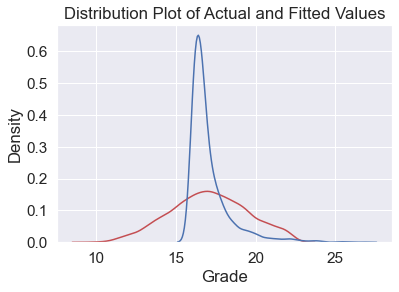

In [104]:
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Value')
sns.distplot(yhat, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.title('Distribution Plot of Actual and Fitted Values')
plt.xlabel('Grade')

With a score of 0.309 with only one variable I want to test if we could improve that score by adding other variables

In [105]:
features = ['appl_tot', 'semester', 'name', 'days']
X = df[features]
X_num = df[features].select_dtypes(include='number')
X_cat = X.drop(columns=X_num.columns)
y = df['BI']
# Standardize the numeric variables
X_num_scaled = pd.DataFrame(s_scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

# Get dummy variables for the categorical values
X_dummies = pd.get_dummies(X_cat, prefix_sep='_')
X_dummies = X_dummies.astype('float')

X = X_dummies.join(X_num_scaled)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr.fit(X_train, y_train)
yhat2 = lr.predict(X_test)
score = lr.score(X_test, y_test)

mse = mean_squared_error(y_test, yhat2)
print('The R^2 score of this model was {:.2f}'.format(score))
print('-----')
print('The Mean Squared Error of this model was {:.2f}'.format(mse))

The R^2 score of this model was 0.60
-----
The Mean Squared Error of this model was 2.43


By adding which semester it was and what type of program we increased the score to 0.51

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.1, 0.95, 'R^2 = 0.60\nMSE = 2.43')

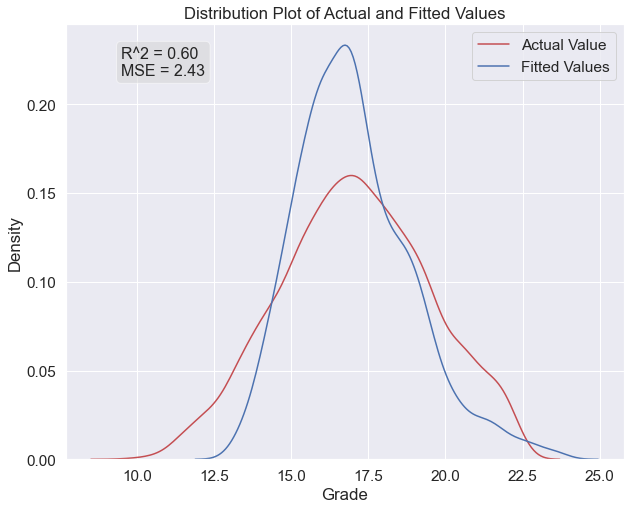

In [139]:
fig, ax = plt.subplots(figsize=(10, 8))
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Value')
sns.distplot(yhat2, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.title('Distribution Plot of Actual and Fitted Values')
plt.xlabel('Grade')
plt.legend()

textstr = 'R^2 = {:.2f}\nMSE = {:.2f}'.format(score, mse)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.10, 0.95, textstr, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

In [109]:
uni_count = df.Uni.value_counts().to_frame()

Removing the schools with <90 data points

In [110]:
uni_list = list(uni_count[uni_count['Uni'] >90].index)

df3 = df_2[df_2.Uni.isin(uni_list)]
df3.size

169617

In [115]:
features = ['appl_tot', 'semester', 'name', 'Uni', 'days']
X = df3[features]
X_num = df3[features].select_dtypes(include='number')
X_cat = X.drop(columns=X_num.columns)
y = df3.BI

# Standardize the numeric variables
X_num_scaled = pd.DataFrame(s_scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

# Get dummy variables for the categorical values
X_dummies = pd.get_dummies(X_cat, prefix_sep='_')
X_dummies = X_dummies.astype('float')

X = X_dummies.join(X_num_scaled)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr.fit(X_train, y_train)
yhat3 = lr.predict(X_test)
score = lr.score(X_test, y_test)

mse = mean_squared_error(y_test, yhat3)
print('The R^2 score of this model was {:.2f}'.format(score))
print('-----')
print('The Mean Squared Error of this model was {:.2f}'.format(mse))

The R^2 score of this model was 0.60
-----
The Mean Squared Error of this model was 2.43


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


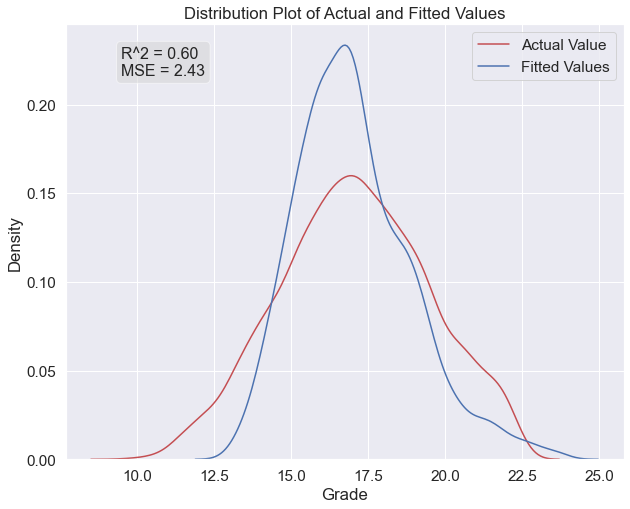

In [142]:
fig, ax = plt.subplots(figsize=(10, 8))
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Value')
sns.distplot(yhat3, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.title('Distribution Plot of Actual and Fitted Values')
plt.xlabel('Grade')
plt.legend()
textstr = 'R^2 = {:.2f}\nMSE = {:.2f}'.format(score, mse)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.10, 0.95, textstr, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

plt.savefig('distplot.png')

# Testing

To test the model with a real case I prepared a case with the features of the Law program at Stockholms University spring semester 2021. The actual lowest admission grade will not be released until december. Hence, I cannot validate it quite yet.

In [119]:
test_data = {
    'appl_tot':[4639],
    'semester': 'VT',
    'name': 'Juristprogrammet',
    'Uni': 'Stockholms universitet',
    'days': [((dt.datetime.strptime('2021-01-01', '%Y-%m-%d')-df3.date.min())/np.timedelta64(1, 'D'))]
                    }
test = pd.DataFrame(data=test_data)
                 
df_test = pd.concat([df3, test], ignore_index=True)
df_test.fillna(0)

,BI,Termin,Program/kurs,name,Anm.kod,Uni,appl_tot,appl_1,f_appl_1,f_tot,...,m_tot,25-34_1,25-34_tot,<=24_1,<=24_tot,>=35_1,>=35_tot,semester,date,days
0,14.10,HT2020,Program,Sjuksköterskeprogrammet,BTH-87005,Blekinge tekniska högskola,668,147.0,111.0,507.0,...,156.0,53.0,203.0,59.0,374.0,33.0,86.0,HT,2020-07-01 00:00:00,3653.0
1,15.06,HT2020,Program,Civilingenjör,BTH-87006,Blekinge tekniska högskola,279,55.0,4.0,25.0,...,254.0,7.0,31.0,48.0,244.0,0.0,4.0,HT,2020-07-01 00:00:00,3653.0
2,16.61,HT2020,Program,Ekonomprogrammet,BTH-87008,Blekinge tekniska högskola,324,24.0,5.0,92.0,...,230.0,5.0,23.0,19.0,298.0,0.0,1.0,HT,2020-07-01 00:00:00,3653.0
3,14.85,HT2020,Program,Civilingenjör,BTH-87012,Blekinge tekniska högskola,250,48.0,3.0,19.0,...,229.0,1.0,19.0,47.0,228.0,0.0,1.0,HT,2020-07-01 00:00:00,3653.0
4,12.17,HT2020,Program,Produktutveckling,BTH-87013,Blekinge tekniska högskola,489,91.0,41.0,244.0,...,244.0,49.0,259.0,12.0,122.0,30.0,107.0,HT,2020-07-01 00:00:00,3653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,15.40,VT2011,Program,Sjuksköterskeprogrammet,UMU-01325,Umeå universitet,394,42.0,32.0,303.0,...,88.0,13.0,129.0,22.0,236.0,7.0,26.0,VT,2011-01-01 00:00:00,184.0
8074,20.80,VT2011,Program,Tandläkarprogrammet,UMU-01403,Umeå universitet,833,177.0,103.0,509.0,...,298.0,47.0,189.0,112.0,576.0,11.0,42.0,VT,2011-01-01 00:00:00,184.0
8075,11.37,VT2011,Program,Förskolläraprogrammet,UMU-01603,Umeå universitet,195,81.0,69.0,169.0,...,26.0,32.0,65.0,45.0,125.0,4.0,5.0,VT,2011-01-01 00:00:00,184.0
8076,14.60,VT2011,Program,Sjuksköterskeprogrammet,UMU-SDMSS,Umeå universitet,26,22.0,17.0,20.0,...,6.0,11.0,13.0,11.0,13.0,0.0,0.0,VT,2011-01-01 00:00:00,184.0


In [121]:
features = ['appl_tot', 'semester', 'name', 'Uni', 'days']
X = df_test[features]
X_num = df_test[features].select_dtypes(include='number')
X_cat = X.drop(columns=X_num.columns)
y = df_test.BI

# Standardize the numeric variables
X_num_scaled = pd.DataFrame(s_scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

# Get dummy variables for the categorical values
X_dummies = pd.get_dummies(X_cat, prefix_sep='_')
X_dummies = X_dummies.astype('float')

X = X_dummies.join(X_num_scaled)

In [122]:
X_train, X_test, y_train = X.iloc[:-1], X.iloc[-1:], y.iloc[:-1]
lr.fit(X_train, y_train)
yhat4 = lr.predict(X_test)
print('According to the model the lowest admission grade for law studies at Stockholm Univeristy spring semester 2021 will be {:.2f}'.format(yhat4[0]))

According to the model the lowest admission grade for law studies at Stockholm Univeristy spring semester 2021 will be 19.70


### Adding Unemployement data
One hypothosis I have is that the admission grade has a correlation with the unemployment rate or the emplyment rate. Hence, I extracted data for this from the "Statistics Sweden" (SCB)

In [ ]:
ue_df = pd.read_csv('AKU2013-2020.csv', encoding= 'unicode_escape')

In [ ]:
ue_df.head()

In [ ]:
ue_df = ue_df.transpose()

In [ ]:
ue_df.columns = ue_df.iloc[0]
ue_df = ue_df[1:]

In [ ]:
ue_df.reset_index(inplace=True)

ue_df

In [ ]:
ue_df.rename(columns={'index':'year_month'}, inplace=True)

In [ ]:
ue_df['year'] = ue_df.year_month.apply(lambda x: x[:4])
ue_df['month'] = ue_df.year_month.apply(lambda x: x[-2:])
ue_df['day'] = 1
ue_df['date'] = pd.to_datetime(ue_df[['year', 'month', 'day']])
ue_df.head()

In [ ]:
ue_df.drop(columns=['year', 'month', 'day'], inplace=True)

In [ ]:
df = df.merge(ue_df, on='date')
df.head()

In [ ]:
cols = df.iloc[:,23:].columns
df[cols] = df[cols].apply(pd.to_numeric)
df.info()

In [ ]:
corr = df.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr)

In [ ]:
corr_ue = df.loc[:,'BI':].corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr_ue, annot=True)